In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import scipy.stats as ss
from scipy.interpolate import PchipInterpolator, CubicSpline

In [72]:
df = pd.read_excel('Credit_Ratings_development_CTF_v0.xlsx')
df

,Fitch_grade,Fitch_observed_DR,Moodys_grade,Moodys_observed_DR,SnP_grade,SnP_observed_DR
0,AAA,0.0012,Aaa,0.0000,AAA,0.0000
1,AA+,0.0000,Aa1,0.0000,AA+,0.0000
2,AA,0.0000,Aa2,0.0000,AA,0.0002
3,AA-,0.0008,Aa3,0.0004,AA-,0.0003
4,A+,0.0000,A1,0.0006,A+,0.0005
5,A,0.0007,A2,0.0004,A,0.0005
6,A-,0.0006,A3,0.0006,A-,0.0006
7,BBB+,0.0009,Baa1,0.0012,BBB+,0.0010
8,BBB,0.0006,Baa2,0.0016,BBB,0.0016
9,BBB-,0.0026,Baa3,0.0022,BBB-,0.0025


Далее они будут пронумерованы от 0 до 20

In [73]:

fitch_interpol = PchipInterpolator(np.arange(len(df['Fitch_observed_DR'])),df['Fitch_observed_DR'].sort_values())

In [74]:
fitch_result = fitch_interpol.__call__(np.linspace(0,len(df['Fitch_observed_DR']),10000))

In [75]:
fitch_result = pd.Series(fitch_result)
fitch_result.index = np.linspace(0,20,10000)

<AxesSubplot:title={'center':'Fitch'}>

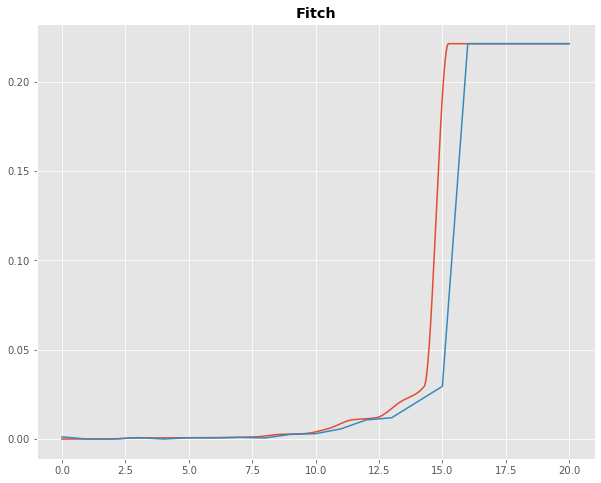

In [76]:
fig = plt.figure(figsize=(10, 8))
plt.title('Fitch', weight="bold")
fitch_result.plot()
df['Fitch_observed_DR'].plot()

<AxesSubplot:title={'center':'Moodys'}>

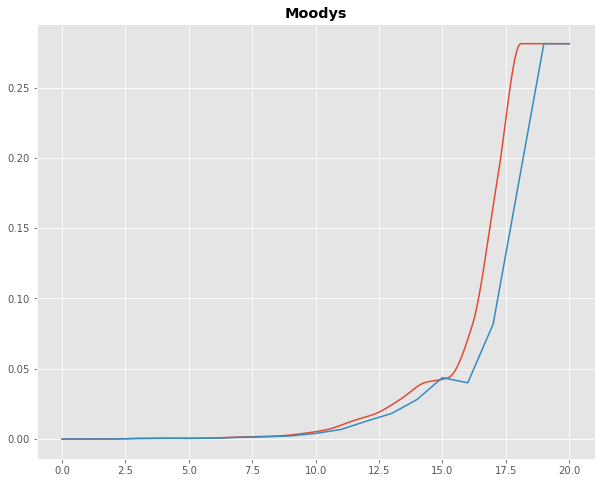

In [77]:
moodys_interpol = PchipInterpolator(np.arange(len(df['Moodys_observed_DR'])),df['Moodys_observed_DR'].sort_values())
moodys_result = moodys_interpol.__call__(np.linspace(0,len(df['Moodys_observed_DR']),10000))
moodys_result = pd.Series(moodys_result)
moodys_result.index = np.linspace(0,20,10000)
fig = plt.figure(figsize=(10, 8))
plt.title('Moodys', weight="bold")
moodys_result.plot()
df['Moodys_observed_DR'].plot()

<AxesSubplot:title={'center':'SnP'}>

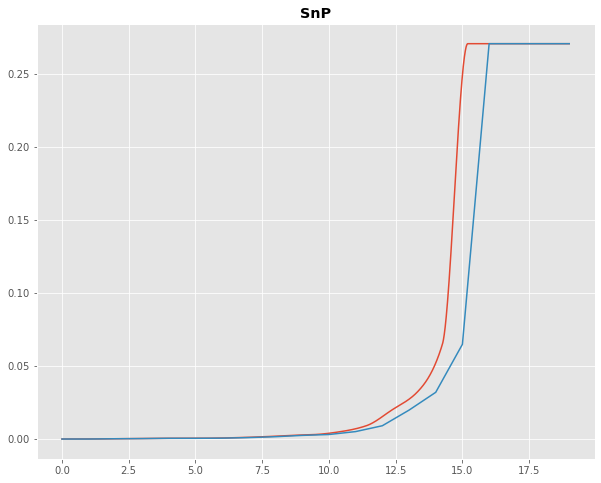

In [78]:
df = df.drop(index =20)
snp_interpol = PchipInterpolator(np.arange(len(df['SnP_observed_DR'])),df['SnP_observed_DR'].sort_values())
snp_result = snp_interpol.__call__(np.linspace(0,len(df['SnP_observed_DR']),10000))
snp_result = pd.Series(snp_result)
snp_result.index = np.linspace(0,19,10000)
fig = plt.figure(figsize=(10, 8))
plt.title('SnP', weight="bold")
snp_result.plot()
df['SnP_observed_DR'].plot()